### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Loading Data set

In [4]:
data = pd.read_csv(r"C:\Users\Hp\Desktop\Task\ds_salaries.csv")
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


### Checking missing values

In [5]:
data.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Get summary statistics for numerical columns

In [6]:
summary_stats = data.describe()
print("\nSummary statistics for numerical columns:")
print(summary_stats)



Summary statistics for numerical columns:
       Unnamed: 0    work_year        salary  salary_in_usd  remote_ratio
count  607.000000   607.000000  6.070000e+02     607.000000     607.00000
mean   303.000000  2021.405272  3.240001e+05  112297.869852      70.92257
std    175.370085     0.692133  1.544357e+06   70957.259411      40.70913
min      0.000000  2020.000000  4.000000e+03    2859.000000       0.00000
25%    151.500000  2021.000000  7.000000e+04   62726.000000      50.00000
50%    303.000000  2022.000000  1.150000e+05  101570.000000     100.00000
75%    454.500000  2022.000000  1.650000e+05  150000.000000     100.00000
max    606.000000  2022.000000  3.040000e+07  600000.000000     100.00000


### EDA AND DATA VIZ

### Salary Distribution Across Job Titles

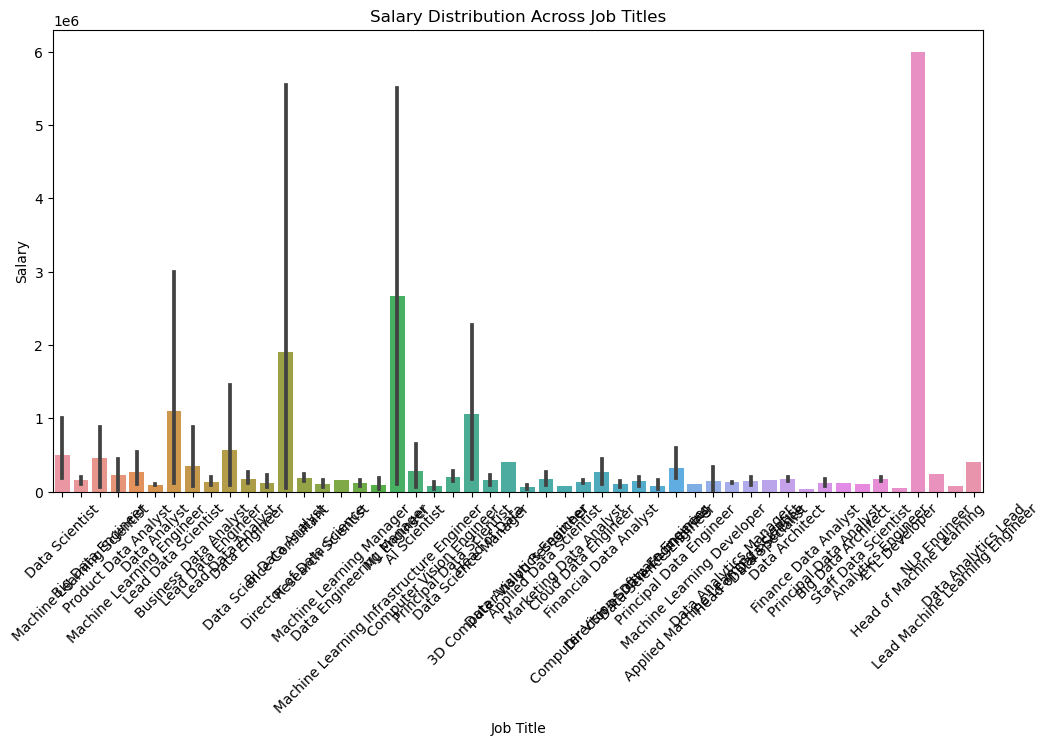

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x='job_title', y='salary', data=data)
plt.xticks(rotation=45)
plt.title('Salary Distribution Across Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.show()

### Salary Distribution Across Experience Levels

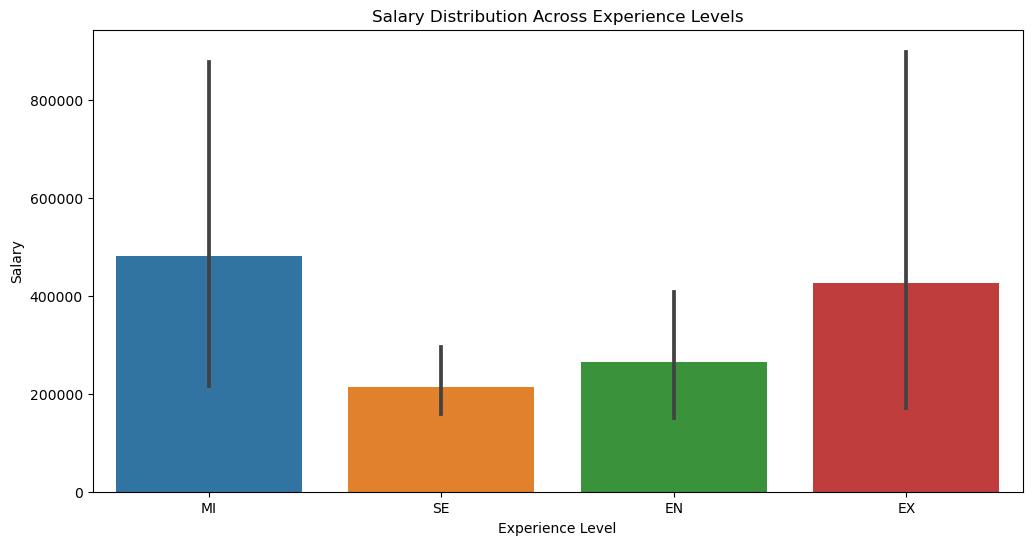

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x='experience_level', y='salary', data=data)
plt.title('Salary Distribution Across Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()


### Salary Distribution Across Employment Types

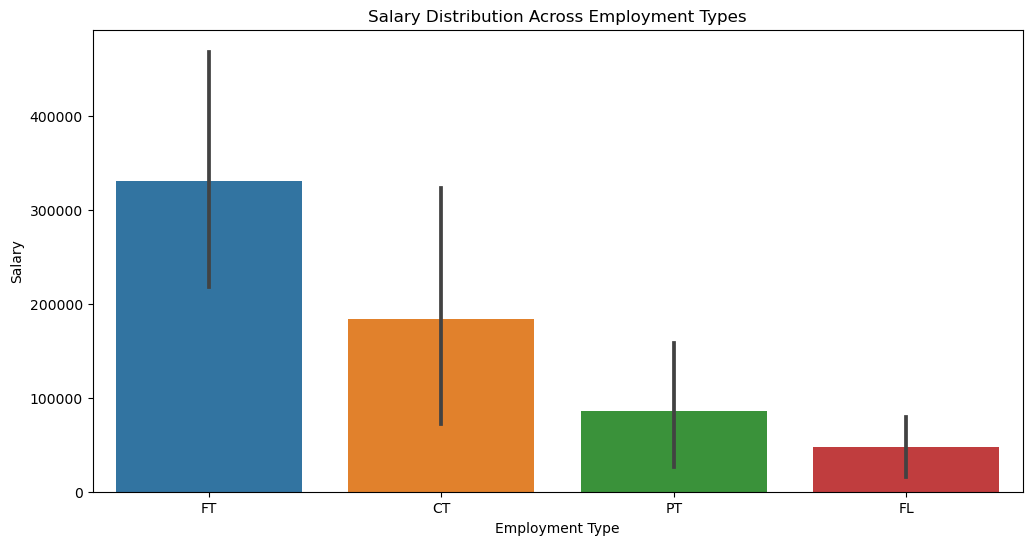

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x='employment_type', y='salary', data=data)
plt.title('Salary Distribution Across Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Salary')
plt.show()

### Visualize relationships using scatter plots and histograms

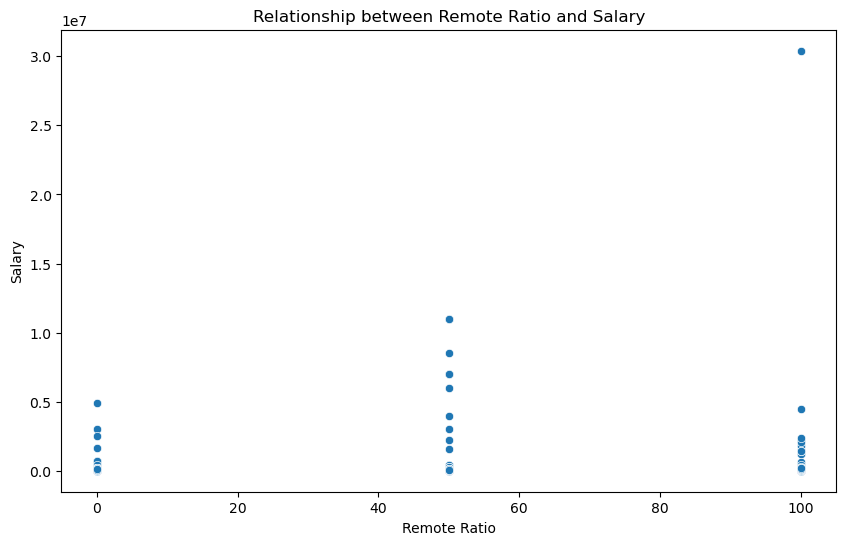

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='remote_ratio', y='salary', data=data)
plt.title('Relationship between Remote Ratio and Salary')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary')
plt.show()


### Relationship between Company Size and Salary

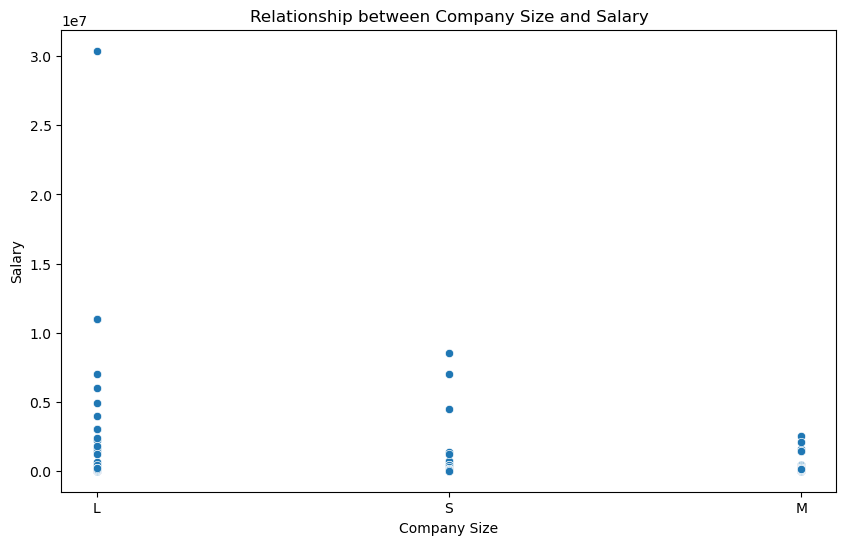

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='company_size', y='salary', data=data)
plt.title('Relationship between Company Size and Salary')
plt.xlabel('Company Size')
plt.ylabel('Salary')
plt.show()

### Visualize trends in remote work percentages and company sizes

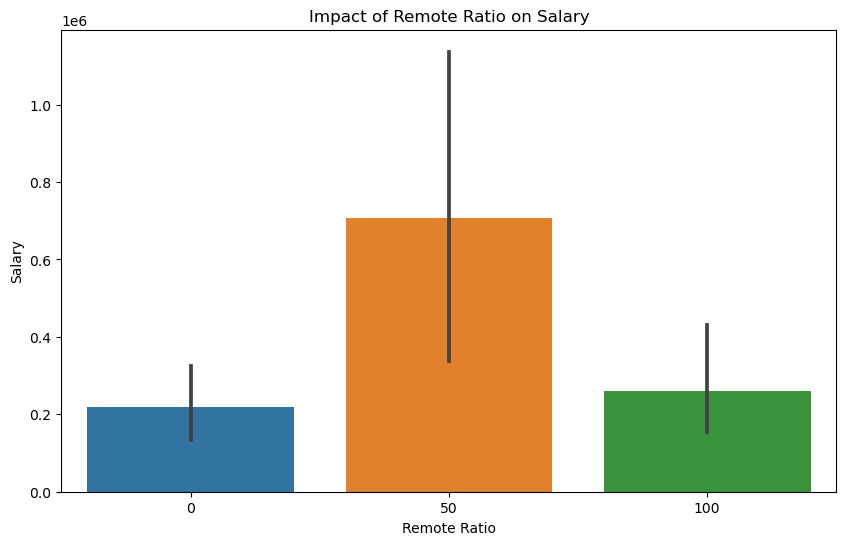

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='remote_ratio', y='salary', data=data)
plt.title('Impact of Remote Ratio on Salary')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary')
plt.show()

### Impact of Company Size on Salary

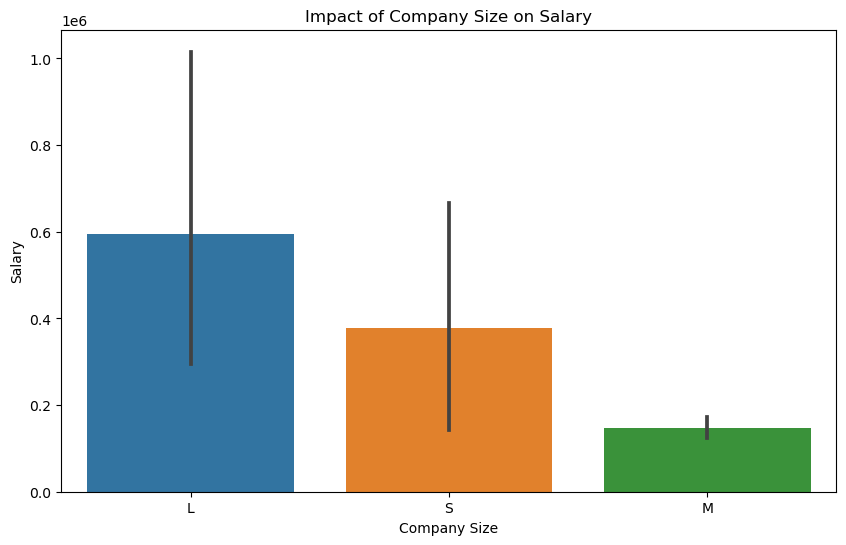

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='company_size', y='salary', data=data)
plt.title('Impact of Company Size on Salary')
plt.xlabel('Company Size')
plt.ylabel('Salary')
plt.show()

### Feature Engineering: Calculate average salary per job title

In [17]:
avg_salary_per_title = data.groupby('job_title')['salary'].mean().reset_index()
avg_salary_per_title.rename(columns={'salary': 'avg_salary_per_title'}, inplace=True)
df = data.merge(avg_salary_per_title, on='job_title', how='left')

In [21]:
avg_salary_per_title

,job_title,avg_salary_per_title
0,3D Computer Vision Researcher,4.000000e+05
1,AI Scientist,2.905714e+05
2,Analytics Engineer,1.750000e+05
3,Applied Data Scientist,1.724000e+05
4,Applied Machine Learning Scientist,1.413500e+05
5,BI Data Analyst,1.902045e+06
6,Big Data Architect,1.250000e+05
7,Big Data Engineer,4.550000e+05
8,Business Data Analyst,3.550000e+05
9,Cloud Data Engineer,1.400000e+05


### Feature Engineering: Calculate average salary per experience level

In [19]:
avg_salary_per_exp = data.groupby('experience_level')['salary'].mean().reset_index()
avg_salary_per_exp.rename(columns={'salary': 'avg_salary_per_experience'}, inplace=True)
df = data.merge(avg_salary_per_exp, on='experience_level', how='left')

In [23]:
avg_salary_per_exp

,experience_level,avg_salary_per_experience
0,EN,264622.454545
1,EX,427072.115385
2,MI,480617.690141
3,SE,213949.353571
